In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
data = pd.read_csv('data.csv')
data.head()

,x,y
0,0.000000,27.827959
1,1.010101,62.656882
2,2.020202,83.692421
3,3.030303,58.885135
4,4.040404,27.270906


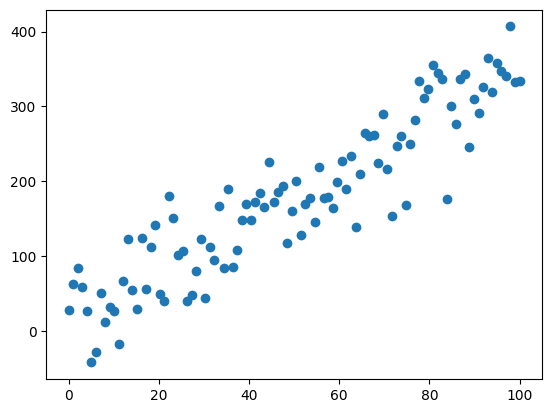

In [26]:
X = np.array(data['x'])
y = np.array(data['y'])
plt.scatter(X, y)

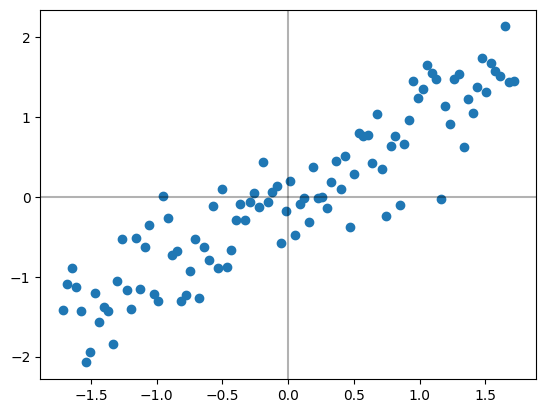

In [27]:
# normalize the data 
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
plt.axhline(0, color='black', alpha= 0.3)
plt.axvline(0, color='black', alpha= 0.3)
plt.scatter(X, y)


In [28]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

In [29]:
def gradient_descent(X, y, theta, learning_rate, iterations, type):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * ( X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        if type == "linear":
            cost_history[it]  = cost_function(X, y, theta)
        elif type == "ridged":
            cost_history[it]  = cost_function(X, y, theta) + (1/m)*learning_rate*np.sum(theta**2)
        elif type == "lasso":
            cost_history[it]  = cost_function(X, y, theta) + (1/m)*learning_rate*np.sum(np.abs(theta))
    return theta, cost_history, theta_history

In [37]:
X = np.reshape(X, (X.shape[0], 1))
y = np.reshape(y, (y.shape[0], 1))
x = np.c_[np.ones((len(X), 1)), X] # add x0 = 1 to each instance
theta0 = np.random.randn(2,1) # random initialization

learning_rate = 0.01
n_iterations = 100

theta, cost_history_liner, theta_history = gradient_descent(x, y, theta0, learning_rate, n_iterations, "linear")

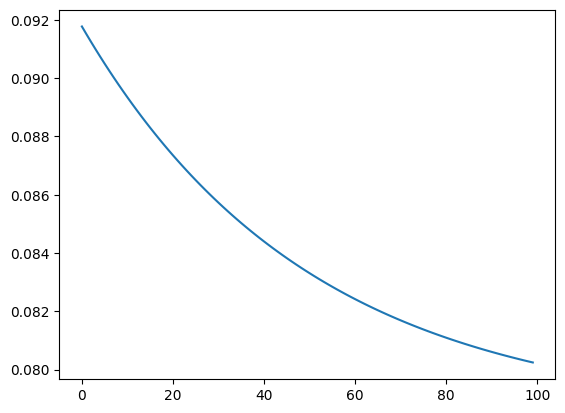

In [38]:
plt.plot(range(n_iterations), cost_history_liner)

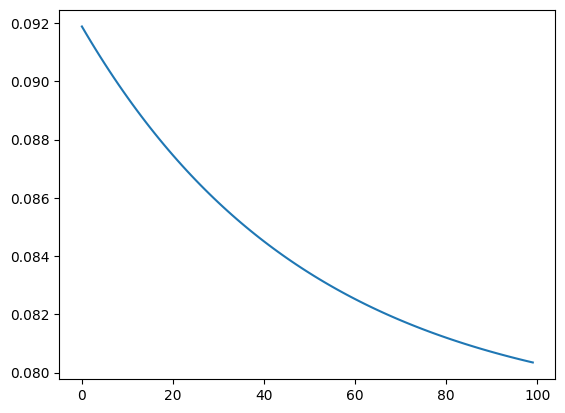

In [39]:
theta, cost_history_lasso , theta_history = gradient_descent(x, y, theta0, learning_rate, n_iterations, "lasso")
plt.plot(range(n_iterations), cost_history_lasso)

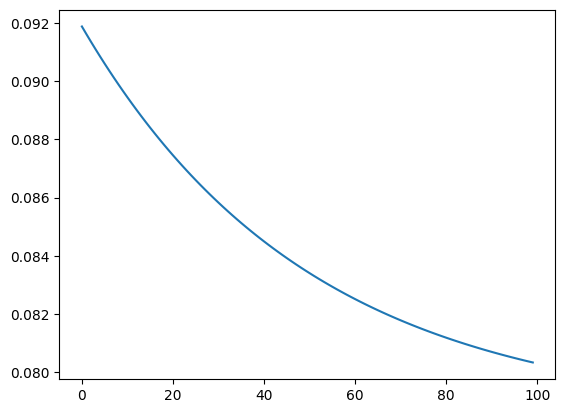

In [40]:
theta, cost_history_ridge, theta_history = gradient_descent(x, y, theta0, learning_rate, n_iterations, "ridged")
plt.plot(range(n_iterations), cost_history_ridge)

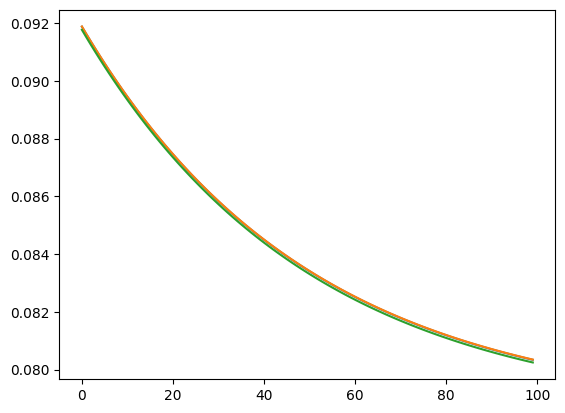

In [41]:
plt.plot(range(n_iterations), cost_history_ridge)
plt.plot(range(n_iterations), cost_history_lasso)
plt.plot(range(n_iterations), cost_history_liner)